In [39]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

np.random.seed(42)

countries = ['France', 'Germany', 'Lithuania', 'Netherlands', 'Spain', 'Poland']
categories = ['Tops', 'Jeans', 'Sneakers', 'Dresses', 'Jackets', 'Bags']
brands = ['Zara', 'Nike', 'Adidas', 'H&M', 'Levi’s', 'Gucci', 'Balenciaga']
shipping_types = ['Standard', 'Pickup', 'Drop-off']

sell_probabilities = {
    'Drop-off': 0.85,
    'Pickup': 0.70,
    'Standard': 0.65
}

n = 10000
data = []

for i in range(n):
    item_id = 10000 + i
    user_id = f"u{np.random.randint(1000, 9999)}"
    country = np.random.choice(countries)
    category = np.random.choice(categories)
    brand = np.random.choice(brands)

    price = round(np.random.normal(loc=30, scale=15), 2)
    price = max(price, 3.0)

    posted = datetime.strptime('2024-01-01', '%Y-%m-%d') + timedelta(days=np.random.randint(0, 550))

    shipping = np.random.choice(shipping_types)
    sell_prob = sell_probabilities[shipping]
    sold_chance = np.random.rand()

    if sold_chance < sell_prob:
        days_to_sell = np.random.randint(1, 30)
        sold_date = posted + timedelta(days=days_to_sell)
    else:
        sold_date = None

    likes = np.random.poisson(5)
    rating = round(np.random.normal(4.5, 0.4), 1)
    rating = min(max(rating, 1.0), 5.0)

    data.append([
        item_id, user_id, country, category, brand,
        price, posted.date(), sold_date.date() if sold_date else None,
        shipping, likes, rating
    ])
    df = pd.DataFrame(data, columns=[
    'item_id', 'user_id', 'country', 'item_category', 'brand',
    'price_eur', 'date_posted', 'date_sold',
    'shipping_type', 'likes_count', 'user_rating'
])

df.to_csv('european_fashion_trends.csv', index=False)

df.head()

,item_id,user_id,country,item_category,brand,price_eur,date_posted,date_sold,shipping_type,likes_count,user_rating
0,10000,u8270,Netherlands,Jackets,Balenciaga,39.72,2024-05-01,2024-05-12,Drop-off,5,5.0
1,10001,u7949,Germany,Dresses,Levi’s,51.94,2024-09-09,2024-10-06,Standard,3,5.0
2,10002,u3734,Poland,Sneakers,H&M,68.39,2024-05-10,2024-05-31,Standard,1,4.7
3,10003,u9792,Netherlands,Bags,Nike,27.90,2024-12-05,2024-12-17,Drop-off,3,4.5
4,10004,u4943,Netherlands,Jeans,Gucci,71.67,2025-04-21,2025-05-03,Drop-off,6,5.0


In [40]:
df['is_sold'] = df['date_sold'].notnull().astype(int)

df['date_posted'] = pd.to_datetime(df['date_posted'])
df['date_sold'] = pd.to_datetime(df['date_sold'])

df['days_to_sell'] = (df['date_sold'] - df['date_posted']).dt.days

In [41]:
shipping_stats = df.groupby('shipping_type').agg(
    total_listings=('item_id', 'count'),
    sold_count=('is_sold', 'sum')
).reset_index()

shipping_stats['sell_rate_percent'] = (shipping_stats['sold_count'] / shipping_stats['total_listings']) * 100

shipping_stats

,shipping_type,total_listings,sold_count,sell_rate_percent
0,Drop-off,3312,2808,84.782609
1,Pickup,3290,2347,71.337386
2,Standard,3398,2224,65.450265


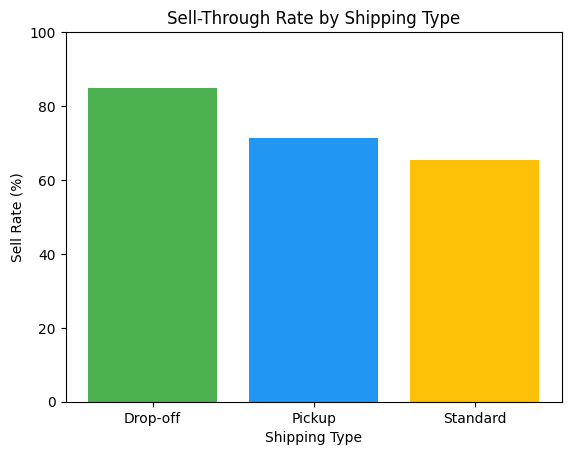

In [42]:
import matplotlib.pyplot as plt

plt.bar(shipping_stats['shipping_type'], shipping_stats['sell_rate_percent'], color=['#4CAF50', '#2196F3', '#FFC107'])
plt.title('Sell-Through Rate by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Sell Rate (%)')
plt.ylim(0, 100)
plt.show()

In [30]:
sold_items = df[df['is_sold'] == 1]

avg_days_to_sell = sold_items.groupby('shipping_type')['days_to_sell'].mean().reset_index()

avg_days_to_sell

,shipping_type,days_to_sell
0,Drop-off,14.960516
1,Pickup,14.888357
2,Standard,15.179081


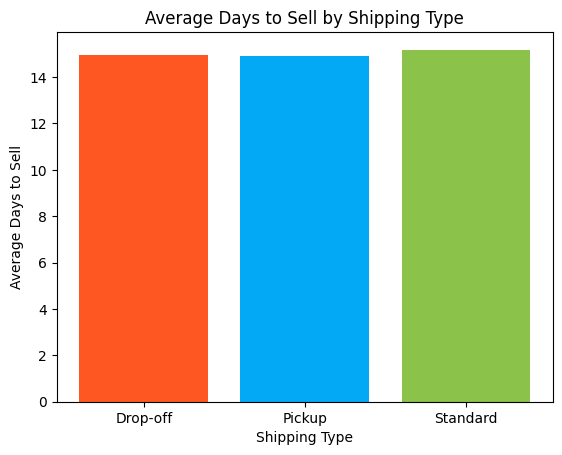

  shipping_type  days_to_sell
0      Drop-off     14.960516
1        Pickup     14.888357
2      Standard     15.179081


In [43]:
plt.bar(avg_days_to_sell['shipping_type'], avg_days_to_sell['days_to_sell'], color=['#FF5722', '#03A9F4', '#8BC34A'])
plt.title('Average Days to Sell by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Average Days to Sell')
plt.show()

print(avg_days_to_sell)

/tmp/ipython-input-44-3693778764.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='shipping_type', y='price_eur', data=df, palette='Set2')


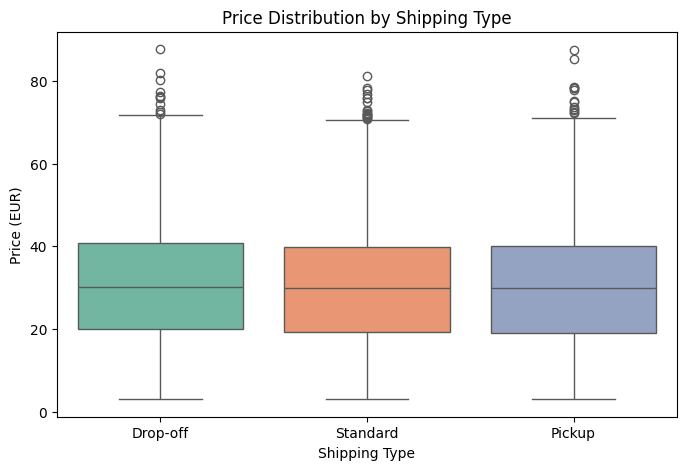

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='shipping_type', y='price_eur', data=df, palette='Set2')
plt.title('Price Distribution by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Price (EUR)')
plt.show()